In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

**Initial loading in of dataframe**

In [2]:
#This is the raw data
df_LOCO = pd.read_json('LOCO.json')


In [3]:
df_LOCO.head()

,doc_id,URL,website,seeds,date,subcorpus,title,txt,txt_nwords,txt_nsentences,txt_nparagraphs,topic_k100,topic_k200,topic_k300,mention_conspiracy,conspiracy_representative,cosine_similarity,FB_shares,FB_comments,FB_reactions
0,C00001,https://humansarefree.com/2016/12/the-conspira...,humansarefree.com,michael.jackson.death,2016-12-30,conspiracy,The 'Conspiracy' Against Lt. Col. Michael Aqui...,"For those who don’t know, Michael Aquino was a...",4075,160,120,k100_24,k200_75,k300_192,8,0.0,0.1768,13.0,2.0,4.0
1,C00003,https://americandigitalnews.com/index.php/2017...,americandigitalnews.com,5g; barack.obama,2017-08-04,conspiracy,ATTORNEYS THAT ROBERT MUELLER HAS HIRED ON HIS...,LEAD INVESTIGATOR — ROBERT MUELLER — Mueller w...,940,67,35,k100_47,k200_80,k300_52,0,0.0,0.0878,0.0,0.0,0.0
2,C00004,https://911truth.org/whats-crazier-believing-t...,911truth.org,saddam.hussein,2009-04-08,conspiracy,"What's crazier, believing the U.S. orchestrate...","""…there can no longer be any serious argument ...",728,69,62,k100_57,k200_17,k300_284,10,0.0,0.1361,0.0,0.0,0.0
3,C00005,https://rense.com/general54/cancer-causing_vac...,rense.com,cancer,NaT,conspiracy,"Cancer-causing Vaccines, Polio, AIDS, and Monk...","The Global Polio Eradication Program, supporte...",5055,207,1,k100_82,k200_183,k300_107,4,0.0,0.1489,3.0,0.0,0.0
4,C00007,https://awarenessact.com/scientist-shares-impo...,awarenessact.com,climate.change; coronavirus,NaT,conspiracy,Scientist Shares Important Tips On Wearing Glo...,While a lot of people are trying to do their b...,403,13,5,k100_59,k200_58,k300_47,0,0.0,0.1401,26.0,4.0,55.0


In [4]:
df_LOCO['subcorpus'].value_counts()

mainstream    72806
conspiracy    23937
Name: subcorpus, dtype: int64

**data visualisation**

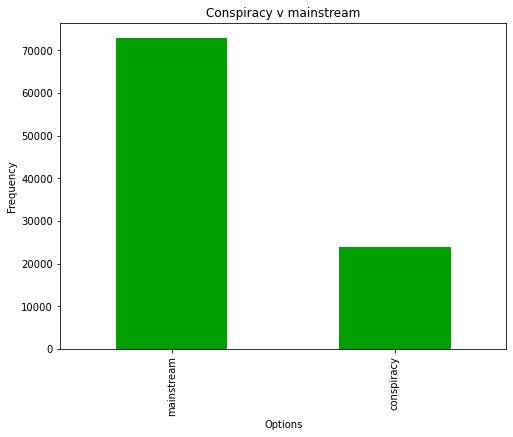

In [5]:
counts = df_LOCO['subcorpus'].value_counts()

plt.figure(figsize=(8,6))
counts.plot(kind = 'bar', color = '#00A000')
plt.xlabel('Options')
plt.ylabel('Frequency')
plt.title('Conspiracy v mainstream')
output_folder = 'plots'
os.makedirs(output_folder, exist_ok=True)
plt.savefig(os.path.join(output_folder, 'ConspVsMainstream.png'))
plt.show()


In [6]:
df_LOCO["seeds"].value_counts().nlargest(60)

aids                                                   3046
september.11.attack                                    2690
population.control                                     2679
cancer                                                 2627
mind.control                                           2536
coronavirus                                            2536
ebola                                                  2479
big.foot                                               2465
gmo                                                    2350
climate.change                                         2273
alien                                                  2268
george.bush                                            2195
covid.19                                               2194
5g                                                     2112
saddam.hussein                                         2094
drug.companies                                         2088
new.world.order                         

To me this is implying an error with the labelling of some of the conspiracy seeds labels, there were only supposed to be 34 possible seeds and so many of these can seemingly be grouped together
Should definitely read through the original release paper, something about this may have been said 

OORRRR

Maybe they are multi-labelled categories, so the last one is 'vaccine; vaccines.autism so is about autism exclusively and 'Climate.change; global.warming' is about global warming specifically. The semi-colon might represent a subclass category kind of thing

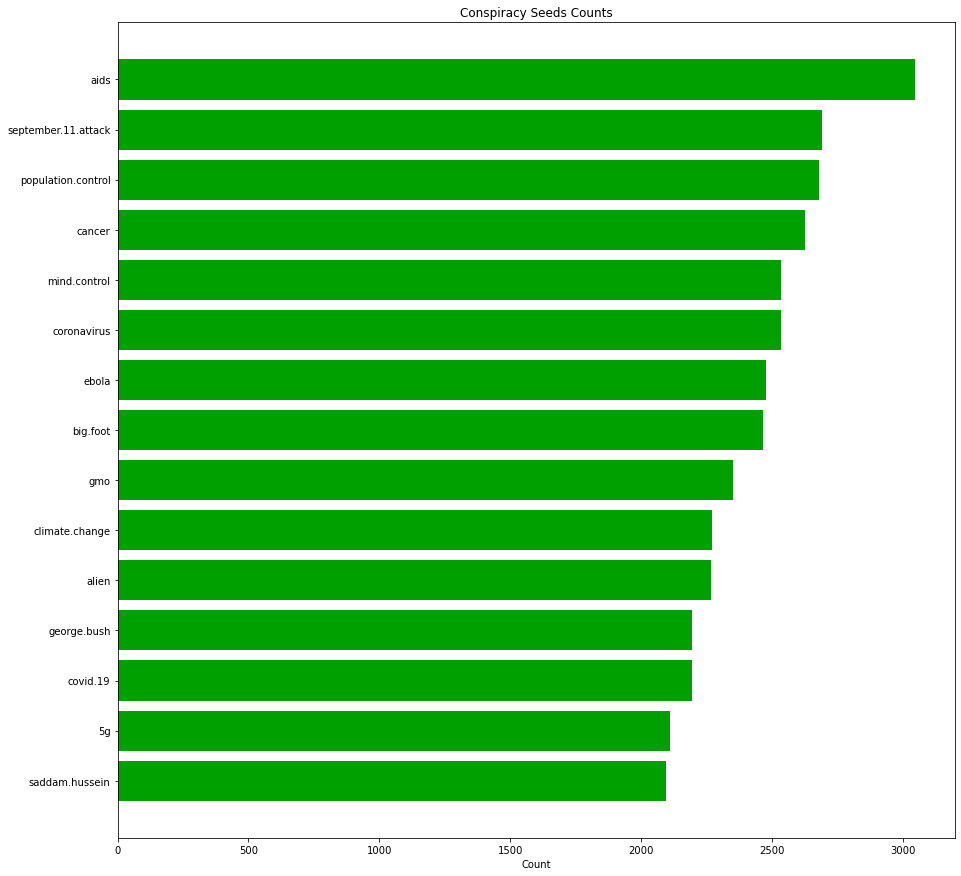

In [4]:
#Visualising the seeds

LOCO_seeds = df_LOCO["seeds"].value_counts()

conspiracy_names = LOCO_seeds.index[:15]
counts = LOCO_seeds.values[:15]

# Create a horizontal bar chart
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
plt.barh(conspiracy_names, counts, color='#00A000')
plt.xlabel('Count')
plt.title('Conspiracy Seeds Counts')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
output_folder = 'plots'
os.makedirs(output_folder, exist_ok=True)
plt.savefig(os.path.join(output_folder, 'Conspiracy_seeds.png'))
plt.show()

**Focusing in on the makeup of the Aids SubSet first**

In [8]:
aids_seed = df_LOCO['seeds'] == 'aids'
df_LOCO_aids = df_LOCO[aids_seed]

In [9]:
df_LOCO_aids.head()

,doc_id,URL,website,seeds,date,subcorpus,title,txt,txt_nwords,txt_nsentences,txt_nparagraphs,topic_k100,topic_k200,topic_k300,mention_conspiracy,conspiracy_representative,cosine_similarity,FB_shares,FB_comments,FB_reactions
17,C00016,https://www.wakingtimes.com/2012/08/10/10750/,wakingtimes.com,aids,2012-08-10,conspiracy,Schedule 1 Drug? Proof That Cannabinoids Are U...,Schedule 1 Drug? Proof That Cannabinoids Are U...,631,24,15,k100_73,k200_64,k300_159,0,0.0,0.1157,0.0,0.0,0.0
73,C0005d,https://fellowshipoftheminds.com/http-fellowsh...,fellowshipoftheminds.com,aids,NaT,conspiracy,A President Who Wants to be King | Fellowship ...,Remind you of anyone we know? LOL\r\n\r\nDAKAR...,319,19,9,k100_89,k200_148,k300_258,0,0.0,0.1381,0.0,0.0,0.0
76,C00060,http://www.illuminati-news.com/McKinlay040706.htm,illuminati-news.com,aids,NaT,conspiracy,Illuminati News: Racism Rules!,"f my sons did not want wars, there would be no...",623,25,9,k100_39,k200_26,k300_114,1,0.0,0.1695,3.0,1.0,1.0
305,C00178,https://newsinsideout.com/2018/04/was-youtube-...,newsinsideout.com,aids,2018-04-16,conspiracy,Was YouTube Shooting a Terrorist Attack? Polic...,"Vancouver, BC – New video published to social ...",633,24,13,k100_9,k200_40,k300_212,3,0.0,0.0991,0.0,0.0,0.0
408,C001f9,https://awarenessact.com/5-healing-crystals-fo...,awarenessact.com,aids,NaT,conspiracy,5 Healing Crystals for Mental Illness,Many people will struggle with some sort of me...,718,46,14,k100_81,k200_76,k300_220,0,0.0,0.1204,12.0,3.0,16.0


In [10]:
df_LOCO_aids['subcorpus'].value_counts()

mainstream    2348
conspiracy     698
Name: subcorpus, dtype: int64

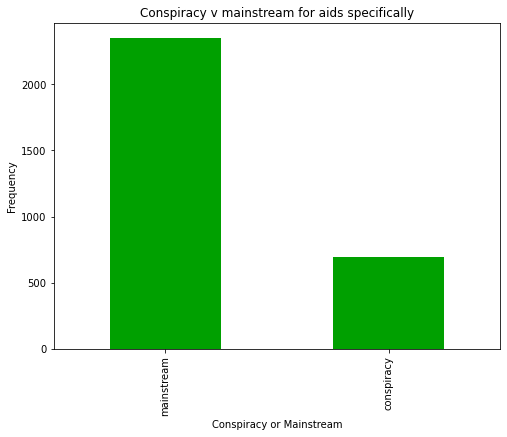

In [11]:
counts = df_LOCO_aids['subcorpus'].value_counts()

plt.figure(figsize=(8,6))
counts.plot(kind = 'bar', color = '#00A000')
plt.xlabel('Conspiracy or Mainstream')
plt.ylabel('Frequency')
plt.title('Conspiracy v mainstream for aids specifically')
output_folder = 'plots'
os.makedirs(output_folder, exist_ok=True)
plt.savefig(os.path.join(output_folder, 'aids_consp_mainstr.png'))
plt.show()

In [12]:
df_LOCO_aids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3046 entries, 17 to 96694
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   doc_id                     3046 non-null   object        
 1   URL                        3046 non-null   object        
 2   website                    3046 non-null   object        
 3   seeds                      3046 non-null   object        
 4   date                       1826 non-null   datetime64[ns]
 5   subcorpus                  3046 non-null   object        
 6   title                      3046 non-null   object        
 7   txt                        3046 non-null   object        
 8   txt_nwords                 3046 non-null   int64         
 9   txt_nsentences             3046 non-null   int64         
 10  txt_nparagraphs            3046 non-null   int64         
 11  topic_k100                 3046 non-null   object        
 12  topi

In [13]:
df_LOCO_aids['txt_nwords'].describe()

count    3046.000000
mean      832.273802
std       931.321897
min        99.000000
25%       347.000000
50%       606.000000
75%       966.500000
max      9117.000000
Name: txt_nwords, dtype: float64

In [14]:
df_LOCO['txt_nwords'].describe()

count    96743.000000
mean       912.427773
std       1058.828202
min         97.000000
25%        343.000000
50%        606.000000
75%       1037.000000
max       9507.000000
Name: txt_nwords, dtype: float64

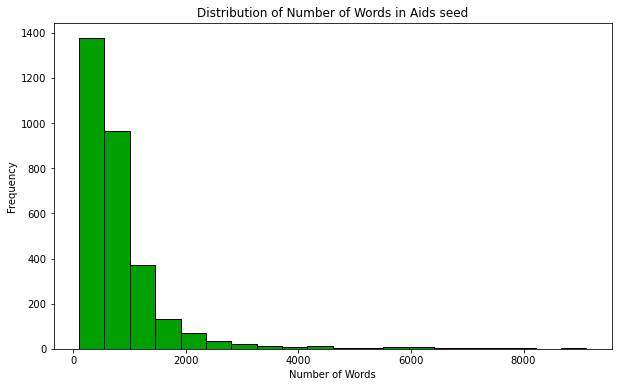

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df_LOCO_aids['txt_nwords'], bins=20, color='#00A000', edgecolor='black')  
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Words in Aids seed')
plt.savefig(os.path.join(output_folder, 'aids_consp_mainstr.png'))
plt.show()

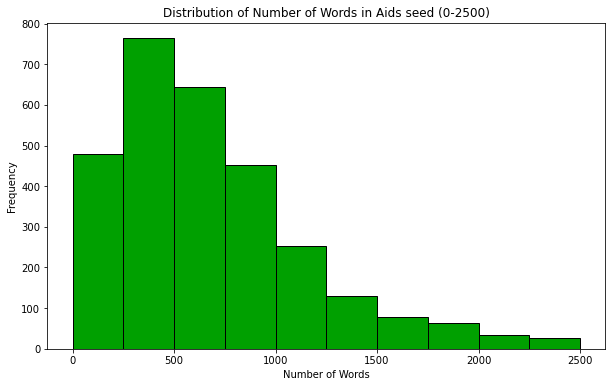

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df_LOCO_aids['txt_nwords'], bins=10, range=(0, 2500), color='#00A000', edgecolor='black')  
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Words in Aids seed (0-2500)')
plt.savefig(os.path.join(output_folder, 'distribution_of_all_AIDS_words'))
plt.show()

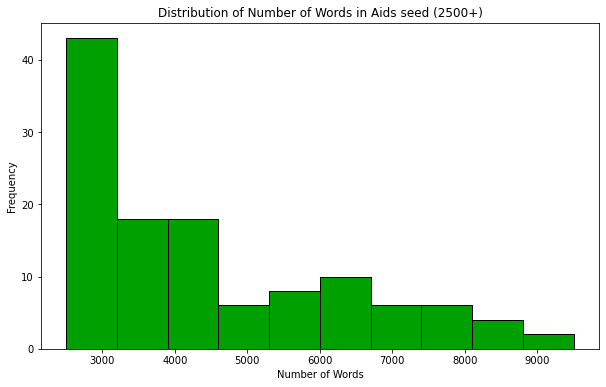

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df_LOCO_aids['txt_nwords'], bins=10, range=(2501, 9500), color='#00A000', edgecolor='black')  
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Words in Aids seed (2500+)')
plt.savefig(os.path.join(output_folder, 'distribution_of_AIDS_words_2500+'))
plt.show()

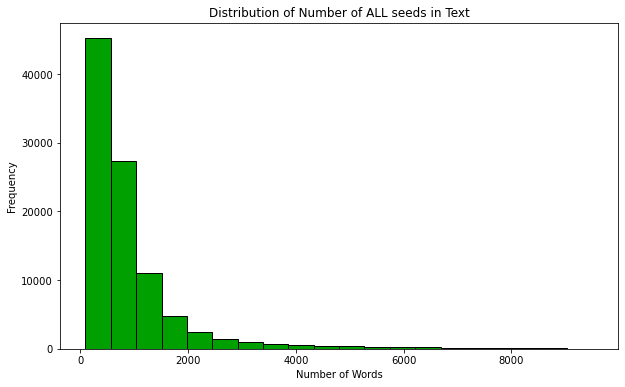

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df_LOCO['txt_nwords'], bins=20, color='#00A000', edgecolor='black')  
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Number of ALL seeds in Text')
plt.savefig(os.path.join(output_folder, 'distribution_of_all_words'))
plt.show()

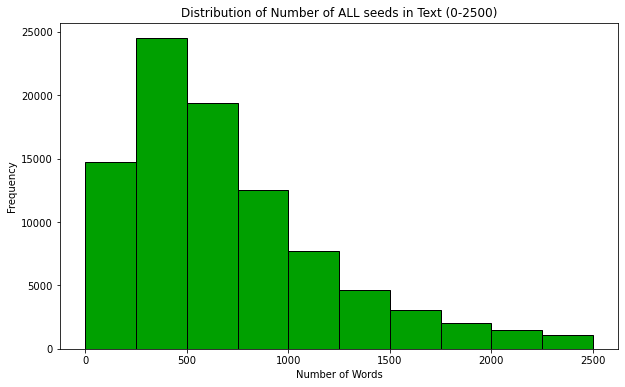

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df_LOCO['txt_nwords'], bins=10, range=(0, 2500), color='#00A000', edgecolor='black')  
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Number of ALL seeds in Text (0-2500)')
plt.savefig(os.path.join(output_folder, 'distribution_of_words_0_2500'))
plt.show()

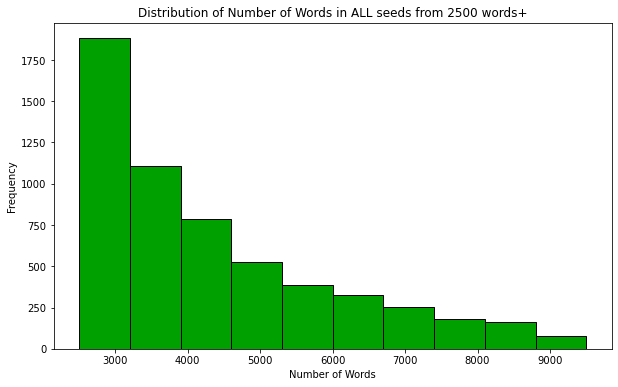

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df_LOCO['txt_nwords'], bins=10, range=(2501, 9500), color='#00A000', edgecolor='black')  
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Words in ALL seeds from 2500 words+')
plt.savefig(os.path.join(output_folder, 'distribution_of_all_word_2500+'))
plt.show()

Trend of articles shorter in length dominate this dataset, dont know if this is signigicant, but the proportion of articles grated than 2000 words are limited although each individual article post 2000 holds up to at least 4x the weight of the smaller more concise articles.

In [21]:
frequencies, bin_edges = np.histogram(df_LOCO['txt_nwords'], bins=10, range=(2501, 9500))

# Sum the frequencies
total_frequency = np.sum(frequencies)

print(f"The total frequency is: {total_frequency}")

The total frequency is: 5688


**Deep dive into the years of dataframe**

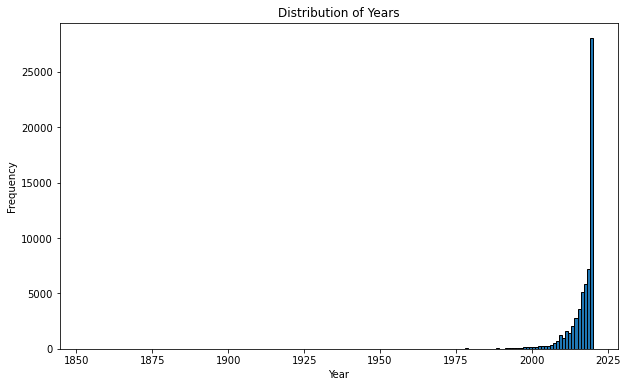

In [22]:
# Extract the year from the 'date' column
df_LOCO['year'] = df_LOCO['date'].dt.year

# Replacing NaT (not a time) with zeroes
df_LOCO['year'].fillna(0, inplace=True)


df_LOCO['year'] = df_LOCO['year'].astype(int)


df_filtered = df_LOCO[df_LOCO['year'] != 0]

plt.figure(figsize=(10, 6))  
plt.hist(df_filtered['year'], bins=range(int(df_filtered['year'].min()), int(df_filtered['year'].max()) + 1), edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Years')
plt.savefig(os.path.join(output_folder, 'distribution_of_all_years'))
plt.show()

In [23]:
min_year = df_filtered['year'].min()
print(f"Minimum Year: {min_year}")

Minimum Year: 1853


In [24]:
#NaT == Not a time
na_count = df_LOCO['date'].isna().sum()
print(f"Number of instances with 'NaT' in the 'year' column: {na_count}")

Number of instances with 'NaT' in the 'year' column: 32875


In [25]:
min_year_index = df_LOCO['date'].idxmin()
min_year_instance = df_LOCO.loc[min_year_index]

print(f"Instance with the Minimum Year:\n{min_year_instance}")

#This has to be a typo surely?

Instance with the Minimum Year:
doc_id                                                                  M11b67
URL                          https://www.scientificamerican.com/article/cal...
website                                                 scientificamerican.com
seeds                                                               sandy.hook
date                                                       1853-04-30 00:00:00
subcorpus                                                           mainstream
title                                           Caloric&mdash;Perpetual Motion
txt                          MESSRS. EDITORS.—In the Scientific Ame rican o...
txt_nwords                                                                1402
txt_nsentences                                                              55
txt_nparagraphs                                                              1
topic_k100                                                             k100_32
topic_k200          

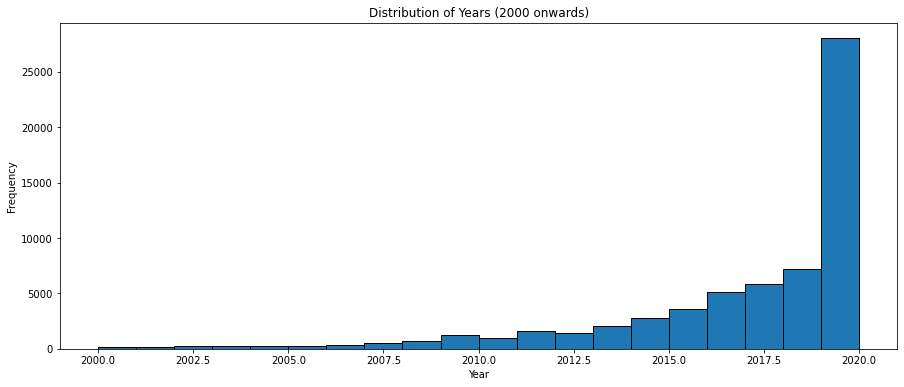

In [26]:
df_LOCO['year'] = df_LOCO['date'].dt.year

df_LOCO['year'].fillna(0, inplace=True)

df_LOCO['year'] = df_LOCO['year'].astype(int)


df_filtered = df_LOCO[df_LOCO['year'] != 0]

# Filter rows from 2000 onwards
df_filtered_2000_onwards = df_filtered[df_filtered['year'] >= 2000]

# Plot the distribution for each year from 2000 onwards
plt.figure(figsize=(15, 6))  
plt.hist(df_filtered_2000_onwards['year'], bins=range(2000, int(df_filtered_2000_onwards['year'].max()) + 1), edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Years (2000 onwards)')
plt.savefig(os.path.join(output_folder, 'distribution_of_years_2000'))

In [27]:
len(df_filtered_2000_onwards)

62801

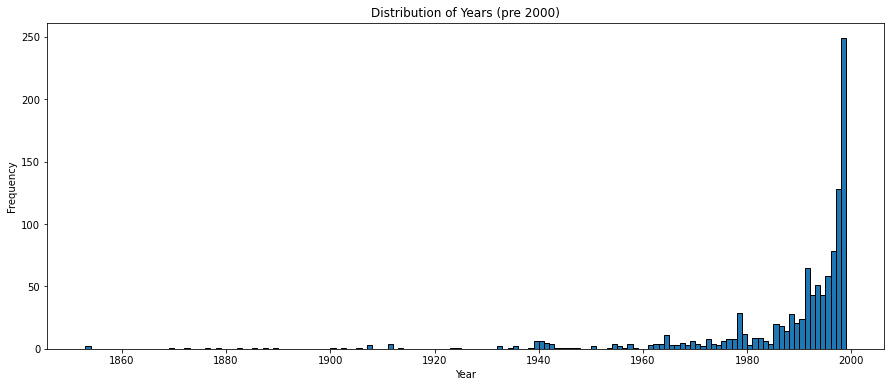

In [28]:
df_LOCO['year'] = df_LOCO['date'].dt.year

df_LOCO['year'].fillna(0, inplace=True)

df_LOCO['year'] = df_LOCO['year'].astype(int)


df_filtered = df_LOCO[df_LOCO['year'] != 0]

# Filter rows from 2000 onwards
df_filtered_pre_2000 = df_filtered[df_filtered['year'] < 2000]

# Plot the distribution for each year from 2000 onwards
plt.figure(figsize=(15, 6))  
plt.hist(df_filtered_pre_2000['year'], bins=range(min_year, 2000), edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Years (pre 2000)')
plt.savefig(os.path.join(output_folder, 'distribution_of_years_pre_2000'))
plt.show()

In [29]:
df_LOCO.head()

,doc_id,URL,website,seeds,date,subcorpus,title,txt,txt_nwords,txt_nsentences,...,topic_k100,topic_k200,topic_k300,mention_conspiracy,conspiracy_representative,cosine_similarity,FB_shares,FB_comments,FB_reactions,year
0,C00001,https://humansarefree.com/2016/12/the-conspira...,humansarefree.com,michael.jackson.death,2016-12-30,conspiracy,The 'Conspiracy' Against Lt. Col. Michael Aqui...,"For those who don’t know, Michael Aquino was a...",4075,160,...,k100_24,k200_75,k300_192,8,0.0,0.1768,13.0,2.0,4.0,2016
1,C00003,https://americandigitalnews.com/index.php/2017...,americandigitalnews.com,5g; barack.obama,2017-08-04,conspiracy,ATTORNEYS THAT ROBERT MUELLER HAS HIRED ON HIS...,LEAD INVESTIGATOR — ROBERT MUELLER — Mueller w...,940,67,...,k100_47,k200_80,k300_52,0,0.0,0.0878,0.0,0.0,0.0,2017
2,C00004,https://911truth.org/whats-crazier-believing-t...,911truth.org,saddam.hussein,2009-04-08,conspiracy,"What's crazier, believing the U.S. orchestrate...","""…there can no longer be any serious argument ...",728,69,...,k100_57,k200_17,k300_284,10,0.0,0.1361,0.0,0.0,0.0,2009
3,C00005,https://rense.com/general54/cancer-causing_vac...,rense.com,cancer,NaT,conspiracy,"Cancer-causing Vaccines, Polio, AIDS, and Monk...","The Global Polio Eradication Program, supporte...",5055,207,...,k100_82,k200_183,k300_107,4,0.0,0.1489,3.0,0.0,0.0,0
4,C00007,https://awarenessact.com/scientist-shares-impo...,awarenessact.com,climate.change; coronavirus,NaT,conspiracy,Scientist Shares Important Tips On Wearing Glo...,While a lot of people are trying to do their b...,403,13,...,k100_59,k200_58,k300_47,0,0.0,0.1401,26.0,4.0,55.0,0


**Conspiracy v Mainstream analysis**

In [30]:
df_conspiracy = df_LOCO[df_LOCO['subcorpus'] == 'conspiracy']

df_mainstream = df_LOCO[df_LOCO['subcorpus'] == 'mainstream']

In [31]:
df_conspiracy.describe()

,txt_nwords,txt_nsentences,txt_nparagraphs,mention_conspiracy,conspiracy_representative,cosine_similarity,FB_shares,FB_comments,FB_reactions,year
count,23937.000000,23937.000000,23937.000000,23937.000000,23937.000000,23937.000000,23936.000000,2.393600e+04,2.393600e+04,23937.000000
mean,1236.315244,59.631407,24.512178,0.350796,0.176589,0.137717,239.625836,2.440559e+02,6.591660e+02,1143.060241
std,1306.764974,69.578137,32.827142,1.548343,0.381328,0.041187,6855.683754,1.051028e+04,2.106302e+04,999.625943
min,100.000000,1.000000,1.000000,0.000000,0.000000,0.002400,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,467.000000,21.000000,9.000000,0.000000,0.000000,0.107300,0.000000,0.000000e+00,0.000000e+00,0.000000
50%,800.000000,37.000000,17.000000,0.000000,0.000000,0.135000,1.000000,0.000000e+00,0.000000e+00,2014.000000
75%,1479.000000,69.000000,29.000000,0.000000,0.000000,0.166800,31.000000,8.000000e+00,2.400000e+01,2019.000000
max,9428.000000,1047.000000,905.000000,75.000000,1.000000,0.280100,989192.000000,1.514558e+06,2.907133e+06,2020.000000


In [32]:
df_mainstream.describe()

,txt_nwords,txt_nsentences,txt_nparagraphs,mention_conspiracy,conspiracy_representative,cosine_similarity,FB_shares,FB_comments,FB_reactions,year
count,72806.000000,72806.000000,72806.000000,72806.000000,0.0,0.0,72799.000000,7.279900e+04,7.279900e+04,72806.000000
mean,805.940747,37.919801,16.563250,0.210752,NaN,NaN,650.233314,8.273005e+02,2.499048e+03,1392.887290
std,939.400907,47.887998,19.297768,1.735130,NaN,NaN,8540.282337,1.699908e+04,3.907850e+04,931.612648
min,97.000000,1.000000,1.000000,0.000000,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,318.000000,14.000000,7.000000,0.000000,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000
50%,551.000000,25.000000,12.000000,0.000000,NaN,NaN,5.000000,0.000000e+00,3.000000e+00,2015.000000
75%,930.000000,44.000000,21.000000,0.000000,NaN,NaN,92.000000,5.900000e+01,1.970000e+02,2019.000000
max,9507.000000,1087.000000,829.000000,182.000000,NaN,NaN,894019.000000,3.257286e+06,5.063897e+06,2020.000000


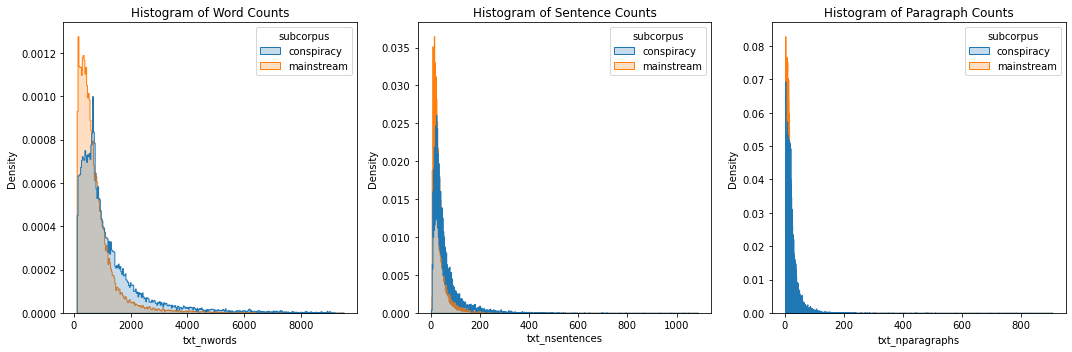

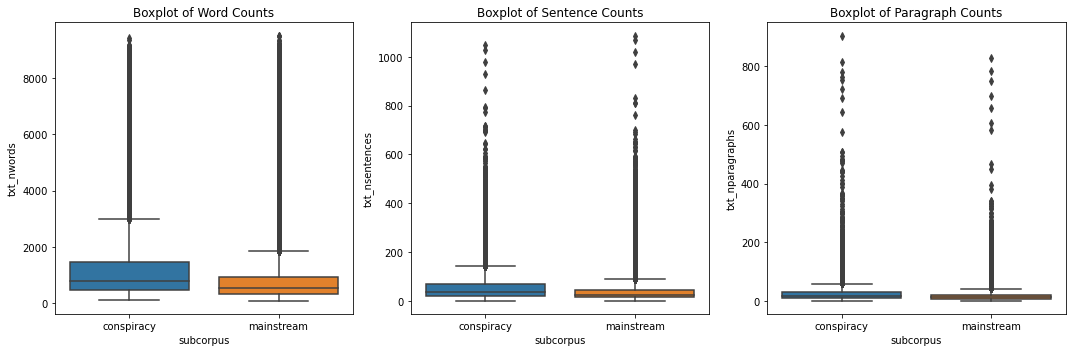

In [33]:
import seaborn as sns


# Histograms for integer value attributes
plt.figure(figsize=(15, 5))

# Histogram for txt_nwords
plt.subplot(1, 3, 1)
sns.histplot(df_LOCO, x="txt_nwords", hue="subcorpus", element="step", stat="density", common_norm=False)
plt.title("Histogram of Word Counts")

# Histogram for txt_nsentences
plt.subplot(1, 3, 2)
sns.histplot(df_LOCO, x="txt_nsentences", hue="subcorpus", element="step", stat="density", common_norm=False)
plt.title("Histogram of Sentence Counts")

# Histogram for txt_nparagraphs
plt.subplot(1, 3, 3)
sns.histplot(df_LOCO, x="txt_nparagraphs", hue="subcorpus", element="step", stat="density", common_norm=False)
plt.title("Histogram of Paragraph Counts")

plt.tight_layout()
plt.show()

# Boxplots for the same attributes
plt.figure(figsize=(15, 5))

# Boxplot for txt_nwords
plt.subplot(1, 3, 1)
sns.boxplot(x="subcorpus", y="txt_nwords", data=df_LOCO)
plt.title("Boxplot of Word Counts")

# Boxplot for txt_nsentences
plt.subplot(1, 3, 2)
sns.boxplot(x="subcorpus", y="txt_nsentences", data=df_LOCO)
plt.title("Boxplot of Sentence Counts")

# Boxplot for txt_nparagraphs
plt.subplot(1, 3, 3)
sns.boxplot(x="subcorpus", y="txt_nparagraphs", data=df_LOCO)
plt.title("Boxplot of Paragraph Counts")

plt.tight_layout()
plt.show()

**the intense scatter and variation in data calls for splitting the data
into three dataframes of the length of the articles.**

In [34]:
# df_short_LOCO == articles with between 0 - 1500 words
# df_medium_LOCO == articles with 1501-3000 words
# df_long_LOCO == articles with 3001+ words
df_short_LOCO = df_LOCO[df_LOCO['txt_nwords'] <= 1500]
df_medium_LOCO = df_LOCO[(df_LOCO['txt_nwords'] > 1500) & (df_LOCO['txt_nwords'] <= 3000)]
df_long_LOCO = df_LOCO[df_LOCO['txt_nwords'] > 3000]

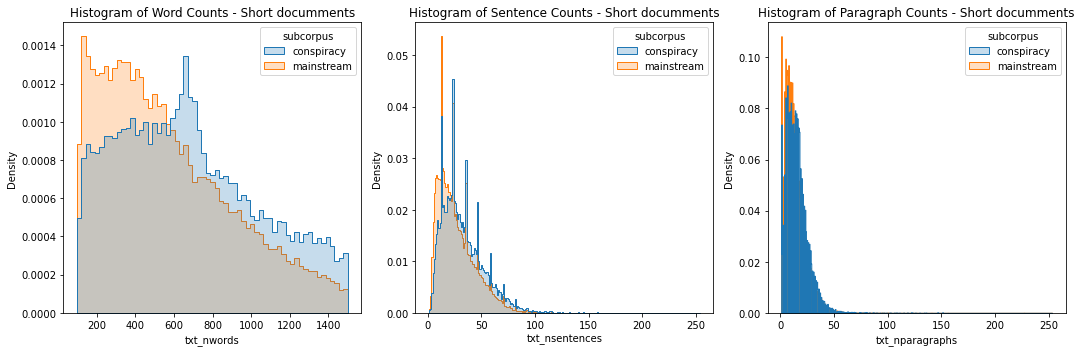

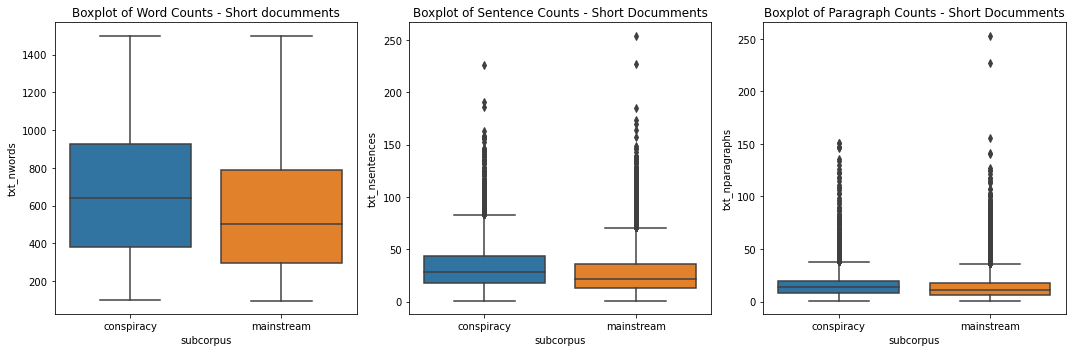

In [35]:
import seaborn as sns


# Histograms for integer value attributes
plt.figure(figsize=(15, 5))

# Histogram for txt_nwords
plt.subplot(1, 3, 1)
sns.histplot(df_short_LOCO, x="txt_nwords", hue="subcorpus", element="step", stat="density", common_norm=False)
plt.title("Histogram of Word Counts - Short documments")

# Histogram for txt_nsentences
plt.subplot(1, 3, 2)
sns.histplot(df_short_LOCO, x="txt_nsentences", hue="subcorpus", element="step", stat="density", common_norm=False)
plt.title("Histogram of Sentence Counts - Short documments")

# Histogram for txt_nparagraphs
plt.subplot(1, 3, 3)
sns.histplot(df_short_LOCO, x="txt_nparagraphs", hue="subcorpus", element="step", stat="density", common_norm=False)
plt.title("Histogram of Paragraph Counts - Short documments")

plt.tight_layout()
plt.show()

# Boxplots for the same attributes
plt.figure(figsize=(15, 5))

# Boxplot for txt_nwords
plt.subplot(1, 3, 1)
sns.boxplot(x="subcorpus", y="txt_nwords", data=df_short_LOCO)
plt.title("Boxplot of Word Counts - Short documments")

# Boxplot for txt_nsentences
plt.subplot(1, 3, 2)
sns.boxplot(x="subcorpus", y="txt_nsentences", data=df_short_LOCO)
plt.title("Boxplot of Sentence Counts - Short Documments")

# Boxplot for txt_nparagraphs
plt.subplot(1, 3, 3)
sns.boxplot(x="subcorpus", y="txt_nparagraphs", data=df_short_LOCO)
plt.title("Boxplot of Paragraph Counts - Short Documments")

plt.tight_layout()
plt.show()

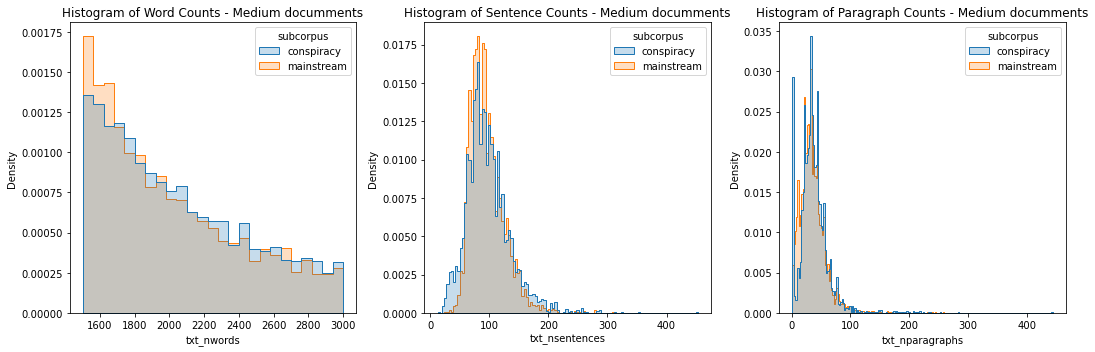

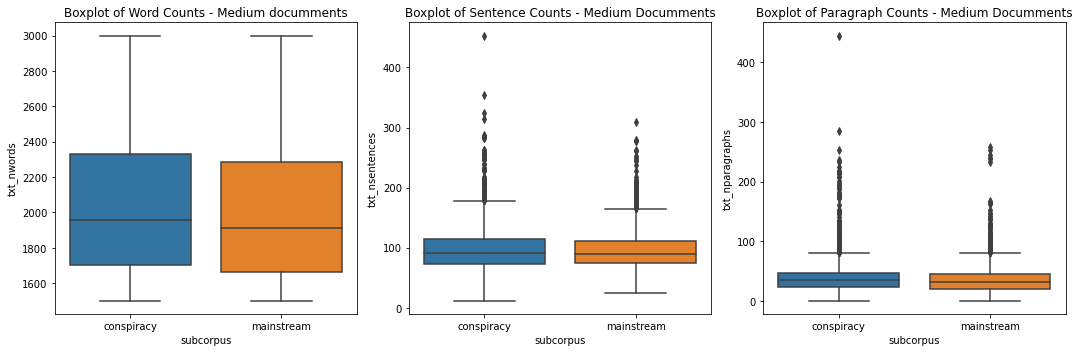

In [36]:
# Histograms for integer value attributes
plt.figure(figsize=(15, 5))

# Histogram for txt_nwords
plt.subplot(1, 3, 1)
sns.histplot(df_medium_LOCO, x="txt_nwords", hue="subcorpus", element="step", stat="density", common_norm=False)
plt.title("Histogram of Word Counts - Medium documments")

# Histogram for txt_nsentences
plt.subplot(1, 3, 2)
sns.histplot(df_medium_LOCO, x="txt_nsentences", hue="subcorpus", element="step", stat="density", common_norm=False)
plt.title("Histogram of Sentence Counts - Medium documments")

# Histogram for txt_nparagraphs
plt.subplot(1, 3, 3)
sns.histplot(df_medium_LOCO, x="txt_nparagraphs", hue="subcorpus", element="step", stat="density", common_norm=False)
plt.title("Histogram of Paragraph Counts - Medium documments")

plt.tight_layout()
plt.show()

# Boxplots for the same attributes
plt.figure(figsize=(15, 5))

# Boxplot for txt_nwords
plt.subplot(1, 3, 1)
sns.boxplot(x="subcorpus", y="txt_nwords", data=df_medium_LOCO)
plt.title("Boxplot of Word Counts - Medium documments")

# Boxplot for txt_nsentences
plt.subplot(1, 3, 2)
sns.boxplot(x="subcorpus", y="txt_nsentences", data=df_medium_LOCO)
plt.title("Boxplot of Sentence Counts - Medium Documments")

# Boxplot for txt_nparagraphs
plt.subplot(1, 3, 3)
sns.boxplot(x="subcorpus", y="txt_nparagraphs", data=df_medium_LOCO)
plt.title("Boxplot of Paragraph Counts - Medium Documments")

plt.tight_layout()
plt.show()

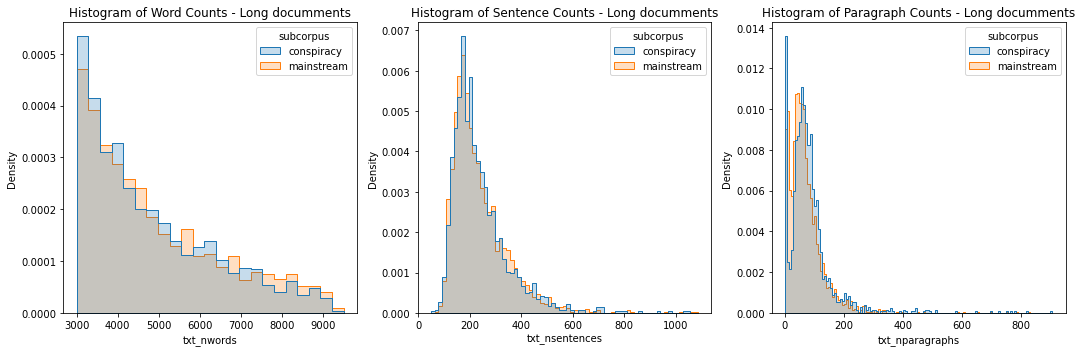

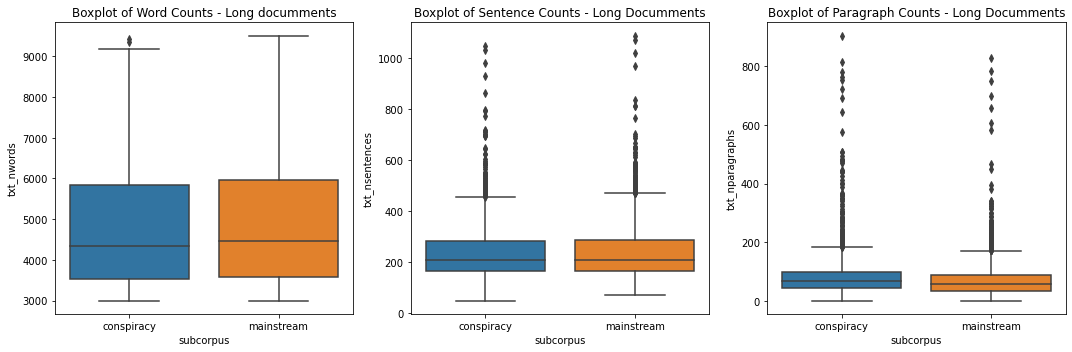

In [37]:
# Histograms for integer value attributes
plt.figure(figsize=(15, 5))

# Histogram for txt_nwords
plt.subplot(1, 3, 1)
sns.histplot(df_long_LOCO, x="txt_nwords", hue="subcorpus", element="step", stat="density", common_norm=False)
plt.title("Histogram of Word Counts - Long documments")

# Histogram for txt_nsentences
plt.subplot(1, 3, 2)
sns.histplot(df_long_LOCO, x="txt_nsentences", hue="subcorpus", element="step", stat="density", common_norm=False)
plt.title("Histogram of Sentence Counts - Long documments")

# Histogram for txt_nparagraphs
plt.subplot(1, 3, 3)
sns.histplot(df_long_LOCO, x="txt_nparagraphs", hue="subcorpus", element="step", stat="density", common_norm=False)
plt.title("Histogram of Paragraph Counts - Long documments")

plt.tight_layout()
plt.show()

# Boxplots for the same attributes
plt.figure(figsize=(15, 5))

# Boxplot for txt_nwords
plt.subplot(1, 3, 1)
sns.boxplot(x="subcorpus", y="txt_nwords", data=df_long_LOCO)
plt.title("Boxplot of Word Counts - Long documments")

# Boxplot for txt_nsentences
plt.subplot(1, 3, 2)
sns.boxplot(x="subcorpus", y="txt_nsentences", data=df_long_LOCO)
plt.title("Boxplot of Sentence Counts - Long Documments")

# Boxplot for txt_nparagraphs
plt.subplot(1, 3, 3)
sns.boxplot(x="subcorpus", y="txt_nparagraphs", data=df_long_LOCO)
plt.title("Boxplot of Paragraph Counts - Long Documments")

plt.tight_layout()
plt.show()

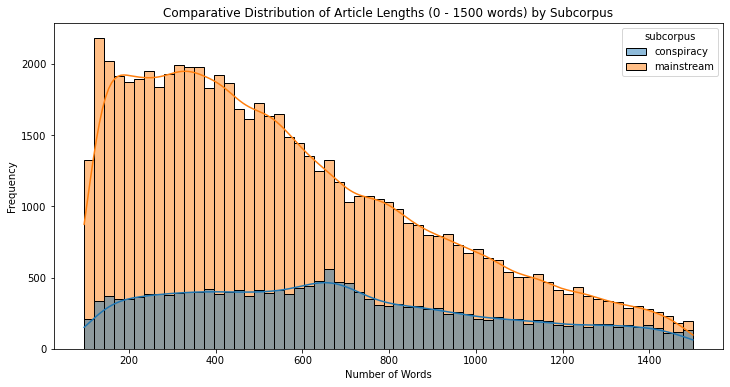

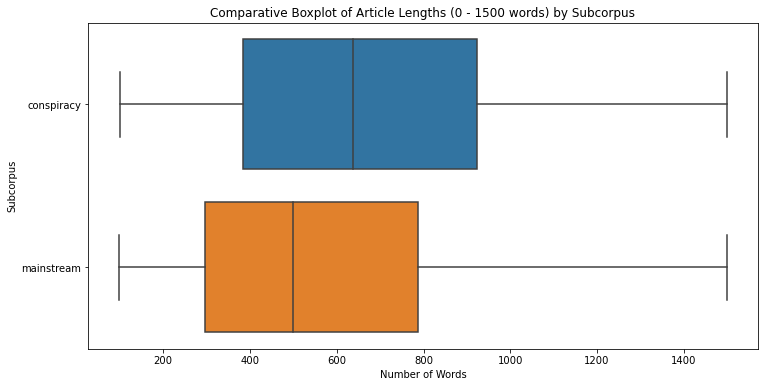

In [38]:
# Comparative Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df_short_LOCO, x='txt_nwords', hue='subcorpus', kde=True)
plt.title('Comparative Distribution of Article Lengths (0 - 1500 words) by Subcorpus')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Comparative Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_short_LOCO, x='txt_nwords', y='subcorpus')
plt.title('Comparative Boxplot of Article Lengths (0 - 1500 words) by Subcorpus')
plt.xlabel('Number of Words')
plt.ylabel('Subcorpus')
plt.show()

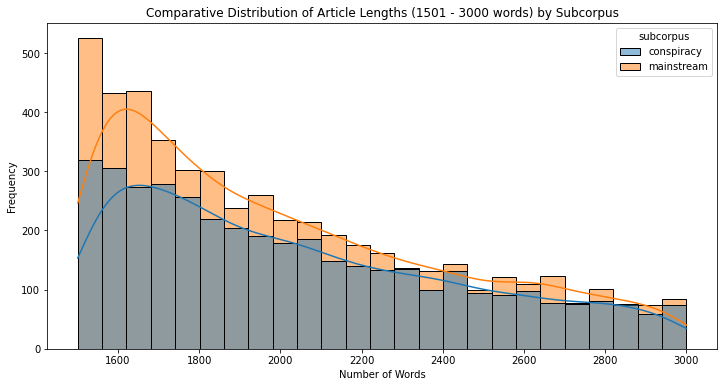

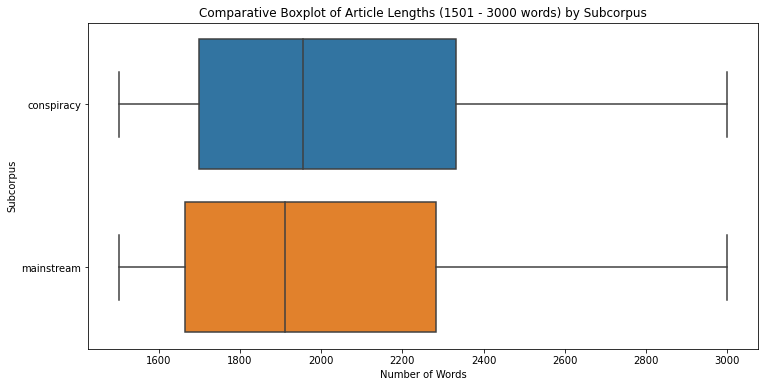

In [39]:
# Comparative Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df_medium_LOCO, x='txt_nwords', hue='subcorpus', kde=True)
plt.title('Comparative Distribution of Article Lengths (1501 - 3000 words) by Subcorpus')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Comparative Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_medium_LOCO, x='txt_nwords', y='subcorpus')
plt.title('Comparative Boxplot of Article Lengths (1501 - 3000 words) by Subcorpus')
plt.xlabel('Number of Words')
plt.ylabel('Subcorpus')
plt.show()

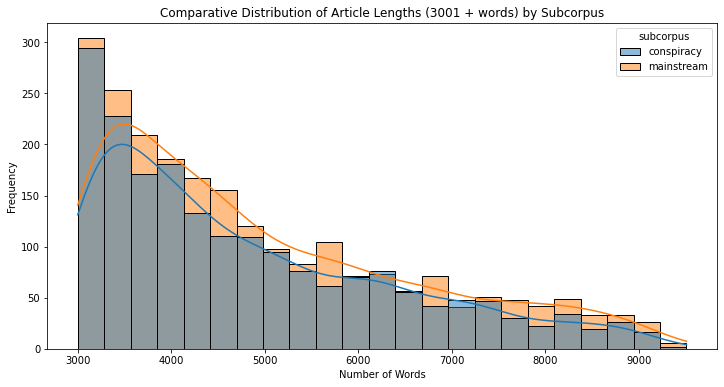

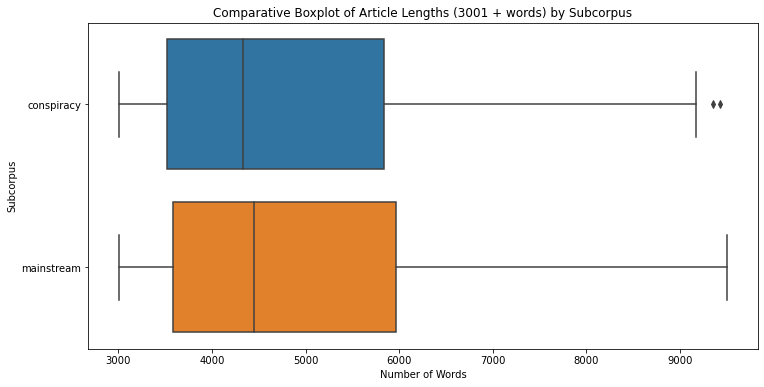

In [40]:
# Comparative Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df_long_LOCO, x='txt_nwords', hue='subcorpus', kde=True)
plt.title('Comparative Distribution of Article Lengths (3001 + words) by Subcorpus')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Comparative Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_long_LOCO, x='txt_nwords', y='subcorpus')
plt.title('Comparative Boxplot of Article Lengths (3001 + words) by Subcorpus')
plt.xlabel('Number of Words')
plt.ylabel('Subcorpus')
plt.show()

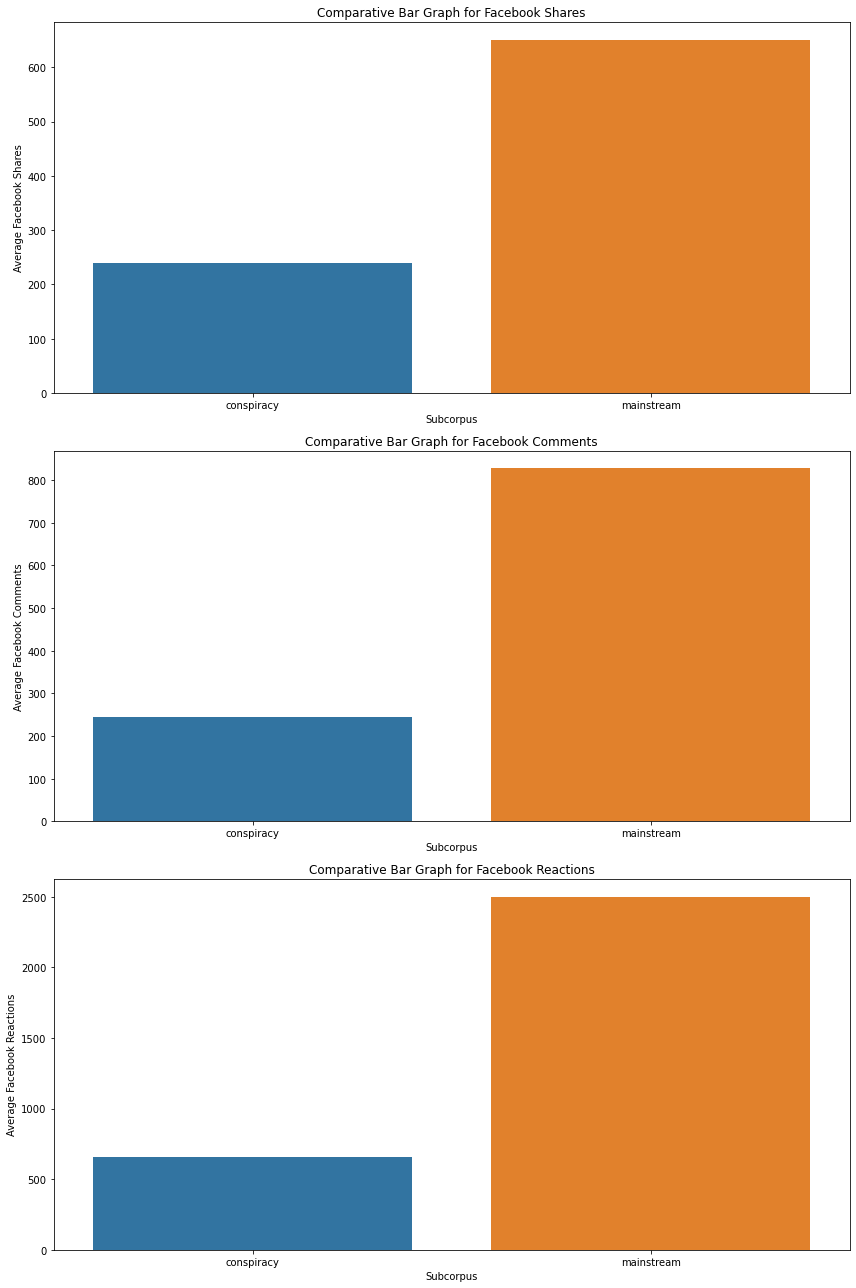

In [41]:
# Creating comparative plots for Facebook interactions
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Comparative Bar Graph for FB Shares
sns.barplot(ax=axes[0], data=df_LOCO, x='subcorpus', y='FB_shares', ci=None)
axes[0].set_title('Comparative Bar Graph for Facebook Shares')
axes[0].set_xlabel('Subcorpus')
axes[0].set_ylabel('Average Facebook Shares')

# Comparative Bar Graph for FB Comments
sns.barplot(ax=axes[1], data=df_LOCO, x='subcorpus', y='FB_comments', ci=None)
axes[1].set_title('Comparative Bar Graph for Facebook Comments')
axes[1].set_xlabel('Subcorpus')
axes[1].set_ylabel('Average Facebook Comments')

# Comparative Bar Graph for FB Reactions
sns.barplot(ax=axes[2], data=df_LOCO, x='subcorpus', y='FB_reactions', ci=None)
axes[2].set_title('Comparative Bar Graph for Facebook Reactions')
axes[2].set_xlabel('Subcorpus')
axes[2].set_ylabel('Average Facebook Reactions')

plt.tight_layout()
plt.show()

**NLP analysis**

In [32]:
!pip install nltk

In [33]:
doc_id_to_view = 'C00003'  # Replace with the desired document ID
selected_row = df_LOCO[df_LOCO['doc_id'] == doc_id_to_view]

# Access the 'txt' column of the selected row
text_content = selected_row['txt'].values[0]

# Print or do whatever you want with the text content
print(text_content)

LEAD INVESTIGATOR — ROBERT MUELLER — Mueller was the sixth Director of the Federal Bureau of Investigation, serving from 2001 to 2013. A Republican, he was appointed by President George W. Bush and his original ten-year term was given a two-year extension by President Barack Obama, making him the longest-serving FBI director since J. Edgar Hoover.

 NOTE: Robert Mueller is a long time friend of James Comey. He was the person who Clinton had deliver a Uranium sample to Russia. After leaving the FBI in 2013, Mueller served a one-year term as consulting professor and the Arthur and Frank Payne distinguished lecturer at Stanford University, where he focused on issues related to cybersecurity. In addition to his speaking and teaching roles, Mueller also joined the law firm WilmerHale as a partner in its Washington office in 2014. Among other roles at the firm, he oversaw the independent investigation into the NFL’s conduct surrounding the video that appeared to show NFL player Ray Rice assa

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


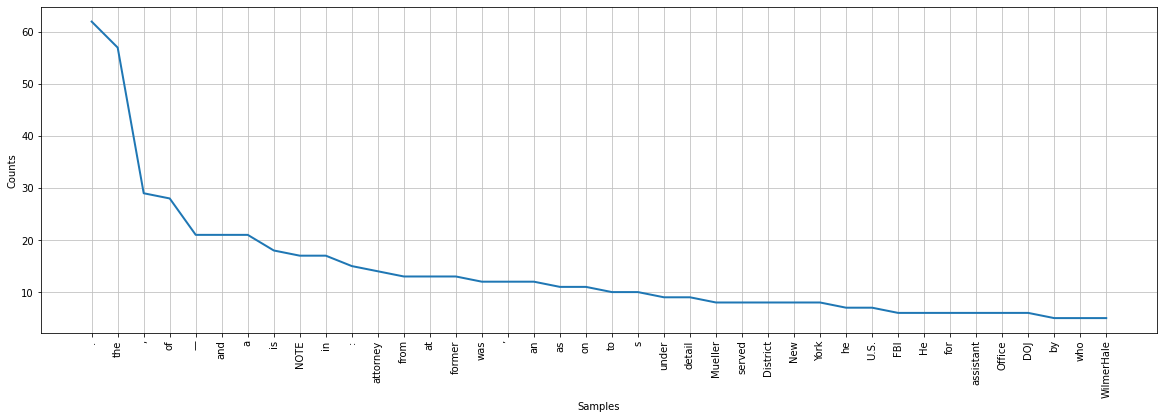

In [34]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Tokenize the 'txt' column of the first row
tokens = word_tokenize(df_LOCO['txt'][1])

from nltk import FreqDist

# Get word frequency distribution for the 'txt' column of the first row
freq_dist = FreqDist(tokens)

plt.figure(figsize=(20, 6))
freq_dist.plot(40, cumulative=False)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


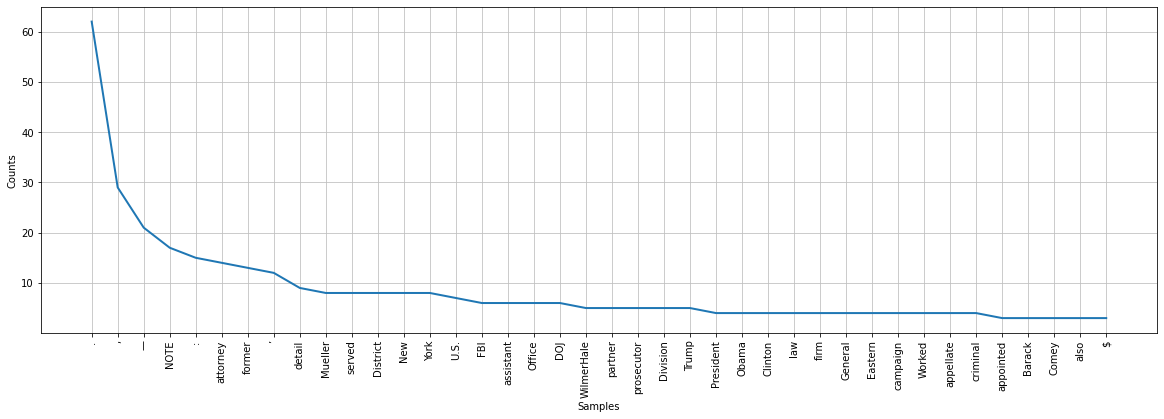

In [35]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

freq_dist = FreqDist(filtered_tokens)

plt.figure(figsize=(20, 6))
freq_dist.plot(40, cumulative=False)
plt.show()